In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Activation,Dropout,Flatten
from keras.callbacks import CSVLogger


In [4]:
image_width,image_height=224,224
input_shape=(image_width, image_height, 3)

In [5]:
train_dir="cats-and-dogs/train"
test_dir="cats-and-dogs/test"

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
print(help('keras.optimizers'))

Help on module keras.optimizers in keras:

NAME
    keras.optimizers - Built-in optimizer classes.

CLASSES
    builtins.object
        Optimizer
            Adadelta
            Adagrad
            Adam
            Adamax
            Nadam
            RMSprop
            SGD
            TFOptimizer
    
    class Adadelta(Optimizer)
     |  Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0, **kwargs)
     |  
     |  Adadelta optimizer.
     |  
     |  Adadelta is a more robust extension of Adagrad
     |  that adapts learning rates based on a moving window of gradient updates,
     |  instead of accumulating all past gradients. This way, Adadelta continues
     |  learning even when many updates have been done. Compared to Adagrad, in the
     |  original version of Adadelta you don't have to set an initial learning
     |  rate. In this version, initial learning rate and decay factor can
     |  be set, as in most other Keras optimizers.
     |  
     |  It is recommended to leave

In [9]:
train_datagen=ImageDataGenerator(rescale=1. /255,shear_range=0.1,zoom_range=0.1,horizontal_flip=True)

In [10]:
test_datagen=ImageDataGenerator(rescale=1. /255)

In [11]:
train_datagenerator=train_datagen.flow_from_directory(train_dir,batch_size=4,target_size=(image_width,image_height),class_mode='binary')

Found 40 images belonging to 2 classes.


In [12]:
test_datagenerator=test_datagen.flow_from_directory(test_dir,target_size=(image_width,image_height),class_mode='binary',batch_size=4)

Found 10 images belonging to 2 classes.


In [20]:
from livelossplot.keras import PlotLossesCallback

In [19]:
!pip install livelossplot

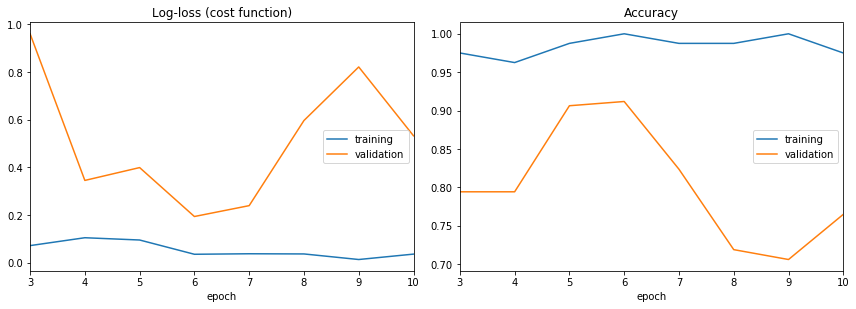

Log-loss (cost function):
training   (min:    0.013, max:    0.104, cur:    0.036)
validation (min:    0.193, max:    0.960, cur:    0.532)

Accuracy:
training   (min:    0.963, max:    1.000, cur:    0.975)
validation (min:    0.706, max:    0.912, cur:    0.765)


In [31]:
history=model.fit_generator(train_datagenerator,steps_per_epoch=20,epochs=10,validation_data=test_datagenerator,validation_steps=10,callbacks=[PlotLossesCallback(),CSVLogger('training.csv',append=False,separator=":")])

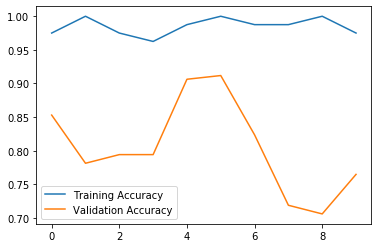

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']  
epochs=range(len(acc))
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.legend()


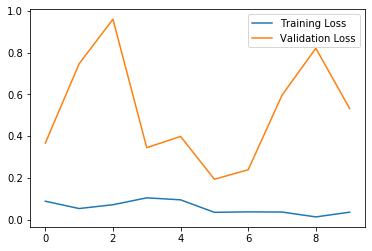

In [33]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.legend()

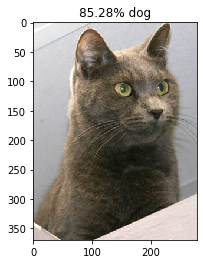

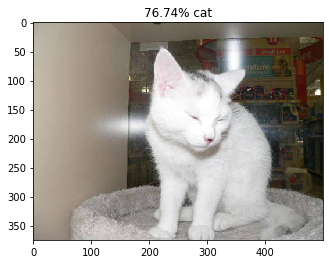

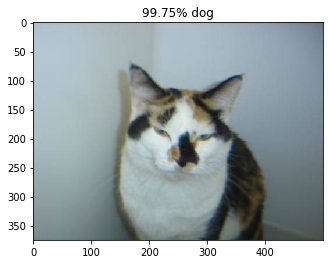

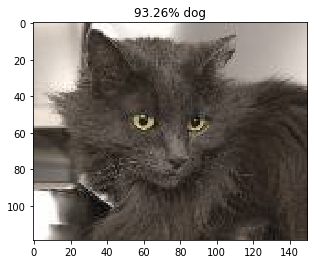

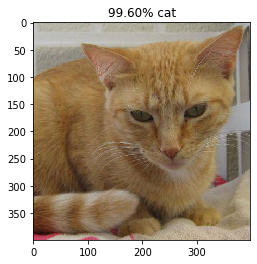

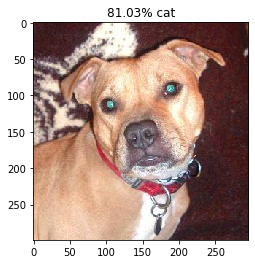

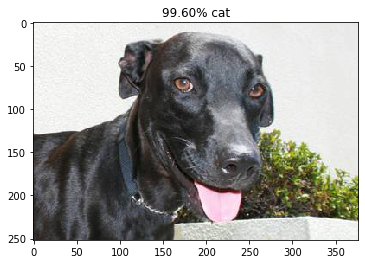

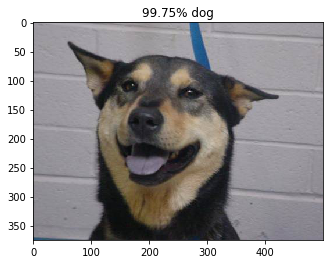

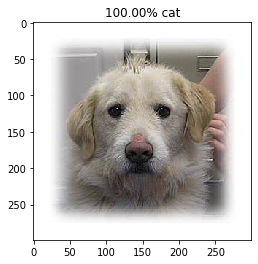

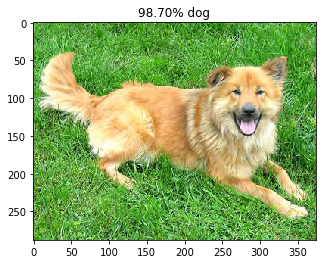

IndexError: list index out of range

In [34]:
probabilities = model.predict_generator(test_datagenerator,steps=10)
for index, probability in enumerate(probabilities):
    image_path = test_dir + "/" +test_datagenerator.filenames[index]
    img = plt.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.show()